In [2]:
from datasets import dataset_utils
import tensorflow as tf

url = "http://download.tensorflow.org/models/vgg_16_2016_08_28.tar.gz"

# 指定保存路径
checkpoints_dir = '/home/zj/github/tensorflow-onnx/tests/models/vgg16/checkpoints'

if not tf.gfile.Exists(checkpoints_dir):
    tf.gfile.MakeDirs(checkpoints_dir)

dataset_utils.download_and_uncompress_tarball(url, checkpoints_dir)


>> Downloading vgg_16_2016_08_28.tar.gz 100.0%
Successfully downloaded vgg_16_2016_08_28.tar.gz 513324920 bytes.


INFO:tensorflow:Restoring parameters from /home/zj/github/tensorflow-onnx/tests/models/vgg16/checkpoints/vgg_16.ckpt


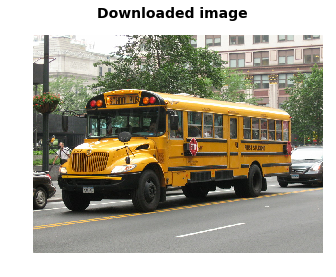

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


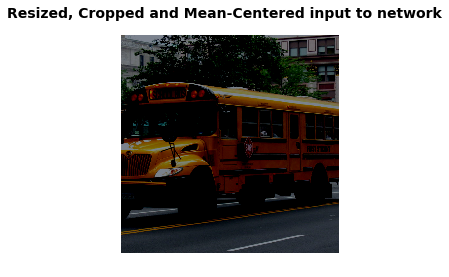

Probability 1.00 => [school bus]
Probability 0.00 => [minibus]
Probability 0.00 => [passenger car, coach, carriage]
Probability 0.00 => [trolleybus, trolley coach, trackless trolley]
Probability 0.00 => [cab, hack, taxi, taxicab]


In [10]:
%matplotlib inline

from matplotlib import pyplot as plt

import numpy as np
import os
import tensorflow as tf
import urllib

from datasets import imagenet
from nets import vgg
from preprocessing import vgg_preprocessing

checkpoints_dir = '/home/zj/github/tensorflow-onnx/tests/models/vgg16/checkpoints'

slim = tf.contrib.slim

# 网络模型的输入图像有默认的尺寸
# 因此，我们需要先调整输入图片的尺寸
image_size = vgg.vgg_16.default_image_size

with tf.Graph().as_default():

    url = "https://upload.wikimedia.org/wikipedia/commons/d/d9/First_Student_IC_school_bus_202076.jpg"

    # 连接网址，下载图片
    image_string = urllib.request.urlopen(url).read()

    # 将图片解码成jpeg格式
    image = tf.image.decode_jpeg(image_string, channels=3)

    # 对图片做缩放操作，保持长宽比例不变，裁剪得到图片中央的区域
    # 裁剪后的图片大小等于网络模型的默认尺寸
    processed_image = vgg_preprocessing.preprocess_image(image,
                                                         image_size,
                                                         image_size,
                                                         is_training=False)

    # 可以批量导入图像
    # 第一个维度指定每批图片的张数
    # 我们每次只导入一张图片
    processed_images  = tf.expand_dims(processed_image, 0)

    # 创建模型，使用默认的arg scope参数
    # arg_scope是slim library的一个常用参数
    # 可以设置它指定网络层的参数，比如stride, padding 等等。
    with slim.arg_scope(vgg.vgg_arg_scope()):
        logits, _ = vgg.vgg_16(processed_images,
                           num_classes=1000,
                           is_training=False)

        # 我们在输出层使用softmax函数，使输出项是概率值
        probabilities = tf.nn.softmax(logits)

    # 创建一个函数，从checkpoint读入网络权值
    init_fn = slim.assign_from_checkpoint_fn(
    os.path.join(checkpoints_dir, 'vgg_16.ckpt'),
    slim.get_model_variables('vgg_16'))

    with tf.Session() as sess:

        # 加载权值
        init_fn(sess)

        # 图片经过缩放和裁剪，最终以numpy矩阵的格式传入网络模型
        np_image, network_input, probabilities = sess.run([image,
                                                       processed_image,
                                                       probabilities])
        probabilities = probabilities[0, 0:]
        sorted_inds = [i[0] for i in sorted(enumerate(-probabilities),
                                        key=lambda x:x[1])]

    # 显示下载的图片
    plt.figure()
    plt.imshow(np_image.astype(np.uint8))
    plt.suptitle("Downloaded image", fontsize=14, fontweight='bold')
    plt.axis('off')
    plt.show()

    # 显示最终传入网络模型的图片
    # 图像的像素值做了[-1, 1]的归一化
    # to show the image.
    plt.imshow( network_input / (network_input.max() - network_input.min()) )
    plt.suptitle("Resized, Cropped and Mean-Centered input to network",
                 fontsize=14, fontweight='bold')
    plt.axis('off')
    plt.show()

    names = imagenet.create_readable_names_for_imagenet_labels()
    for i in range(5):
        index = sorted_inds[i]
        # 打印top5的预测类别和相应的概率值。
        print('Probability %0.2f => [%s]' % (probabilities[index], names[index+1]))

res = slim.get_model_variables()

INFO:tensorflow:Restoring parameters from /home/zj/github/tensorflow-onnx/tests/models/vgg16/checkpoints/vgg_16.ckpt


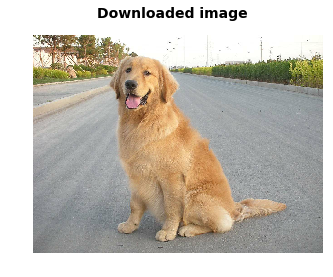

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


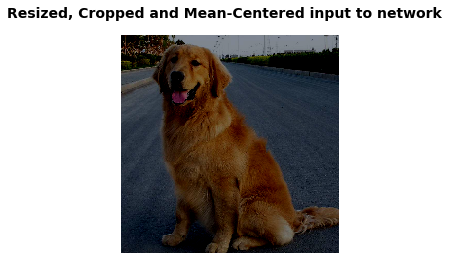

Probability 0.90 => [golden retriever]
Probability 0.05 => [Tibetan mastiff]
Probability 0.02 => [Labrador retriever]
Probability 0.01 => [Newfoundland, Newfoundland dog]
Probability 0.00 => [flat-coated retriever]


In [11]:
%matplotlib inline

from matplotlib import pyplot as plt

import numpy as np
import os
import tensorflow as tf
import urllib

from datasets import imagenet
from nets import vgg
from preprocessing import vgg_preprocessing

checkpoints_dir = '/home/zj/github/tensorflow-onnx/tests/models/vgg16/checkpoints'

slim = tf.contrib.slim

# We need default size of image for a particular network.
# The network was trained on images of that size -- so we
# resize input image later in the code.
image_size = vgg.vgg_16.default_image_size


with tf.Graph().as_default():

#     url = ("https://upload.wikimedia.org/wikipedia/commons/d/d9/"
#            "First_Student_IC_school_bus_202076.jpg")
    
    image_string = tf.gfile.FastGFile('timg.jpeg','rb').read()   #bytes
#     img = tf.image.decode_jpeg(image_raw)
    
    # Open specified url and load image as a string
#     image_string = urllib.request.urlopen(url).read()
    
    
    
    # Decode string into matrix with intensity values
    image = tf.image.decode_jpeg(image_string, channels=3)
    
    # Resize the input image, preserving the aspect ratio
    # and make a central crop of the resulted image.
    # The crop will be of the size of the default image size of
    # the network.
    processed_image = vgg_preprocessing.preprocess_image(image,
                                                         image_size,
                                                         image_size,
                                                         is_training=False)
    
    # Networks accept images in batches.
    # The first dimension usually represents the batch size.
    # In our case the batch size is one.
    processed_images  = tf.expand_dims(processed_image, 0)
    
    # Create the model, use the default arg scope to configure
    # the batch norm parameters. arg_scope is a very conveniet
    # feature of slim library -- you can define default
    # parameters for layers -- like stride, padding etc.
    with slim.arg_scope(vgg.vgg_arg_scope()):
        logits, _ = vgg.vgg_16(processed_images,
                               num_classes=1000,
                               is_training=False)
    
    # In order to get probabilities we apply softmax on the output.
    probabilities = tf.nn.softmax(logits)
    
    # Create a function that reads the network weights
    # from the checkpoint file that you downloaded.
    # We will run it in session later.
    init_fn = slim.assign_from_checkpoint_fn(
        os.path.join(checkpoints_dir, 'vgg_16.ckpt'),
        slim.get_model_variables('vgg_16'))
    
    with tf.Session() as sess:
        
        # Load weights
        init_fn(sess)
        
        # We want to get predictions, image as numpy matrix
        # and resized and cropped piece that is actually
        # being fed to the network.
        np_image, network_input, probabilities = sess.run([image,
                                                           processed_image,
                                                           probabilities])
        probabilities = probabilities[0, 0:]
        sorted_inds = [i[0] for i in sorted(enumerate(-probabilities),
                                            key=lambda x:x[1])]
    
    # Show the downloaded image
    plt.figure()
    plt.imshow(np_image.astype(np.uint8))
    plt.suptitle("Downloaded image", fontsize=14, fontweight='bold')
    plt.axis('off')
    plt.show()
    
    # Show the image that is actually being fed to the network
    # The image was resized while preserving aspect ratio and then
    # cropped. After that, the mean pixel value was subtracted from
    # each pixel of that crop. We normalize the image to be between [-1, 1]
    # to show the image.
    plt.imshow( network_input / (network_input.max() - network_input.min()) )
    plt.suptitle("Resized, Cropped and Mean-Centered input to network",
                 fontsize=14, fontweight='bold')
    plt.axis('off')
    plt.show()

    names = imagenet.create_readable_names_for_imagenet_labels()
    for i in range(5):
        index = sorted_inds[i]
        # Now we print the top-5 predictions that the network gives us with
        # corresponding probabilities. Pay attention that the index with
        # class names is shifted by 1 -- this is because some networks
        # were trained on 1000 classes and others on 1001. VGG-16 was trained
        # on 1000 classes.
        print('Probability %0.2f => [%s]' % (probabilities[index], names[index+1]))
        
    res = slim.get_model_variables()

In [12]:
import tensorflow as tf
import os
from tensorflow.python.tools import freeze_graph

slim = tf.contrib.slim
from tensorflow.contrib.slim.nets import vgg
model_path = os.getcwd() + "/checkpoints/vgg_16.ckpt"  # 设置model的路径


def main():
    tf.reset_default_graph()

    input_node = tf.placeholder(tf.float32, shape=(1, 240, 240, 3), name="input")
    with slim.arg_scope(vgg.vgg_arg_scope()):
        flow, _ = vgg.vgg_16(input_node)
    flow = tf.cast(flow, tf.uint8, 'output')  # 设置输出类型以及输出的接口名字，为了之后的调用pb的时候使用

    saver = tf.train.Saver()
    with tf.Session() as sess:
        saver.restore(sess, model_path)

        # 保存图
        tf.train.write_graph(sess.graph_def, './pb_model', 'model.pb')
        # 把图和参数结构一起
        freeze_graph.freeze_graph('pb_model/model.pb',
                                  '',
                                  False,
                                  model_path,
                                  'output',
                                  'save/restore_all',
                                  'save/Const:0',
                                  'pb_model/frozen_model_vgg_16.pb',
                                  False,
                                  "")

    print("done")


if __name__ == '__main__':
    main()

INFO:tensorflow:Restoring parameters from /home/zj/github/tensorflow-onnx/tests/models/vgg16/checkpoints/vgg_16.ckpt
INFO:tensorflow:Restoring parameters from /home/zj/github/tensorflow-onnx/tests/models/vgg16/checkpoints/vgg_16.ckpt
INFO:tensorflow:Froze 32 variables.
Converted 32 variables to const ops.
done
